In [1]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('data.csv',header=0)

In [3]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [5]:
list(df.columns)

['Fever',
 'Tiredness',
 'Dry-Cough',
 'Difficulty-in-Breathing',
 'Sore-Throat',
 'None_Sympton',
 'Pains',
 'Nasal-Congestion',
 'Runny-Nose',
 'Diarrhea',
 'None_Experiencing',
 'Age_0-9',
 'Age_10-19',
 'Age_20-24',
 'Age_25-59',
 'Age_60+',
 'Gender_Female',
 'Gender_Male',
 'Gender_Transgender',
 'Severity_Mild',
 'Severity_Moderate',
 'Severity_None',
 'Severity_Severe',
 'Contact_Dont-Know',
 'Contact_No',
 'Contact_Yes',
 'Country']

In [13]:
severity=[]
for index, row in df.iterrows():
    if row['Severity_Severe'] == 1:
        severity.append(3)
    if row['Severity_Moderate'] == 1:
        severity.append(2)
    if row['Severity_Mild'] == 1:
        severity.append(1)
    if row['Severity_None'] == 1:
        severity.append(0)    

In [15]:
df['severity']=severity


In [17]:
X = df[['Fever',
 'Tiredness',
 'Dry-Cough',
 'Difficulty-in-Breathing',
 'Sore-Throat',
 'None_Sympton',
 'Pains',
 'Nasal-Congestion',
 'Runny-Nose',
 'Diarrhea',
 'None_Experiencing',
 'Age_0-9',
 'Age_10-19',
 'Age_20-24',
 'Age_25-59',
 'Age_60+',
 'Gender_Female',
 'Gender_Male',
 'Gender_Transgender'
 ]]
y = df[[ 'severity'
 ]]
test_data_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_data_size)
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

In [18]:
corrMatrix = train_data.corr(method = 'pearson')
corrMatrix

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,severity
Fever,1.000000,0.402550,0.050088,-0.135205,-0.163277,-0.173944,-0.001877,-0.001187,-0.000640,0.000533,0.001989,-0.001867,0.001766,-0.000640,0.002416,-0.001670,-0.000747,-0.001475,0.002223,-0.000679
Tiredness,0.402550,1.000000,0.378320,0.001056,-0.133489,-0.258165,0.001574,0.000806,0.000244,-0.000442,0.000662,-0.000757,0.000359,0.000606,0.000123,-0.000330,0.000846,0.000069,-0.000915,-0.001186
Dry-Cough,0.050088,0.378320,1.000000,0.378012,0.051444,-0.292336,0.000233,0.002053,0.001487,0.001498,0.000492,0.000783,-0.001774,0.000492,-0.000377,0.000874,0.001377,-0.001101,-0.000275,0.000187
Difficulty-in-Breathing,-0.135205,0.001056,0.378012,1.000000,0.404845,-0.257735,-0.000313,-0.001641,0.000605,0.000372,-0.000448,0.001497,0.000065,-0.001016,-0.000624,0.000078,-0.000310,0.000524,-0.000215,-0.000989
Sore-Throat,-0.163277,-0.133489,0.051444,0.404845,1.000000,-0.173740,-0.000426,-0.000971,-0.001264,-0.002848,0.001180,0.000332,0.000290,0.000027,-0.000058,-0.000591,-0.000018,0.000535,-0.000517,-0.003040
None_Sympton,-0.173944,-0.258165,-0.292336,-0.257735,-0.173740,1.000000,-0.000276,-0.000196,0.000254,-0.000375,-0.000184,-0.001490,0.000145,0.002317,-0.000371,-0.000602,-0.000690,0.001009,-0.000319,0.000642
Pains,-0.001877,0.001574,0.000233,-0.000313,-0.000426,-0.000276,1.000000,0.310403,-0.069680,-0.178387,-0.238570,-0.000091,0.001105,-0.000812,-0.001276,0.001073,-0.000896,-0.001388,0.002285,-0.000240
Nasal-Congestion,-0.001187,0.000806,0.002053,-0.001641,-0.000971,-0.000196,0.310403,1.000000,0.265198,-0.068597,-0.345216,-0.001693,0.000821,0.000275,-0.002438,0.003030,0.000349,-0.001388,0.001040,-0.000016
Runny-Nose,-0.000640,0.000244,0.001487,0.000605,-0.001264,0.000254,-0.069680,0.265198,1.000000,0.312250,-0.345366,-0.000937,-0.000031,0.001212,-0.000208,-0.000037,-0.000939,0.000282,0.000656,0.000762
Diarrhea,0.000533,-0.000442,0.001498,0.000372,-0.002848,-0.000375,-0.178387,-0.068597,0.312250,1.000000,-0.238740,0.001348,-0.003479,0.002217,0.000915,-0.001001,-0.000505,0.001148,-0.000644,-0.000504


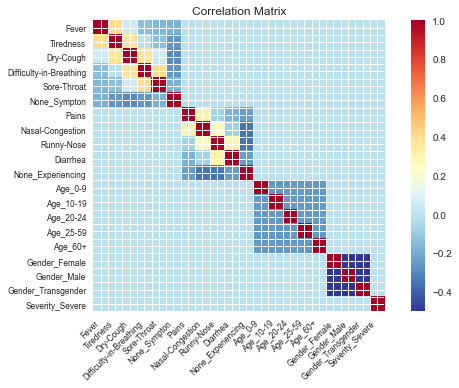

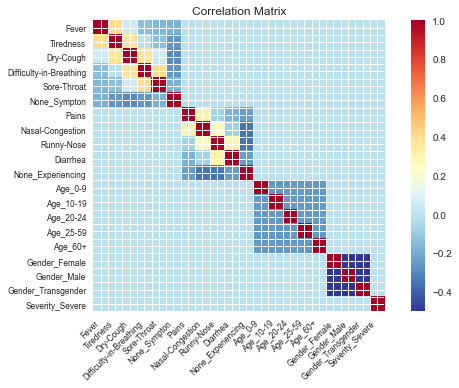

In [8]:
xnames=list(train_data.columns)
ynames=list(train_data.columns)
plot_corr(corrMatrix, xnames=xnames, ynames=ynames,\
          title=None, normcolor=False, cmap='RdYlBu_r')

In [19]:
modelmlp=MLPClassifier(activation='relu',alpha=0.001,hidden_layer_sizes=(6,2),max_iter=1000)

In [20]:
modelmlp.fit(X_train,y_train)

C:\Users\mvlca\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(alpha=0.001, hidden_layer_sizes=(6, 4), max_iter=1000)

In [21]:
modelmlp.score(X_test,y_test)

0.24755892255892256

In [22]:
modelmlp.predict_proba(X_test)

array([[0.24845724, 0.24828057, 0.25336741, 0.24989479],
       [0.24527477, 0.24799928, 0.25459363, 0.25213232],
       [0.2444194 , 0.25053588, 0.25246239, 0.25258233],
       ...,
       [0.24908484, 0.25069928, 0.25090647, 0.2493094 ],
       [0.24614062, 0.25220941, 0.25038732, 0.25126266],
       [0.24161205, 0.2572528 , 0.24705368, 0.25408147]])